In [21]:
%load_ext autoreload
%autoreload 2
%pylab inline
import warnings; warnings.simplefilter('ignore') ; warnings.filterwarnings('ignore')
import logging, sys
logging.disable(sys.maxsize)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [12]:
from Xlib import * 

Insert name of .csv file in the XLib constructor. 

In [41]:
diabetes_tab = TabFile("diabetes.csv")

In [42]:
RF = "RandomForest"
NN = "Neural_Network"
SVM = "SVM"

Build a black box and then evaluate it with f1 score and accuracy.

BlackBox: Support Vector Machine
Accuracy train-set: 0.6517690875232774
Accuracy test-set: 0.6493506493506493
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

   micro avg       0.65      0.65      0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231

Accuracy: 0.65 (+/- 0.01)
Confusion matrix, without normalization
F1 for class: 0.0


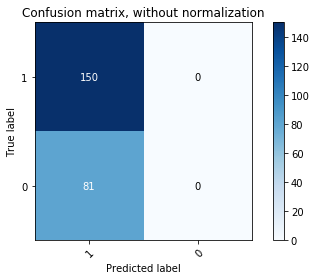

In [43]:
diabetes_tab.play(SVM)
diabetes_tab.evaluate(SVM)

BlackBox: Neural Network
Accuracy train-set: 0.7728119180633147
Accuracy test-set: 0.6753246753246753
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       150
           1       0.54      0.52      0.53        81

   micro avg       0.68      0.68      0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231

Accuracy: 0.71 (+/- 0.15)
Confusion matrix, without normalization
F1 for class: 0.5283018867924528


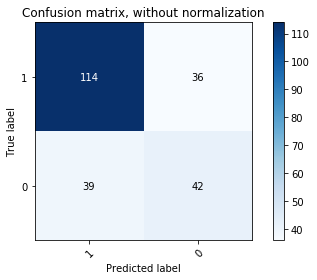

In [44]:
diabetes_tab.play(NN)
diabetes_tab.evaluate(NN)

In [45]:
diabetes_tab.play(RF)

BlackBox: Random Forest
Accuracy train-set: 0.9683426443202979
Accuracy test-set: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

Accuracy: 0.79 (+/- 0.08)
Confusion matrix, without normalization
F1 for class: 0.589041095890411


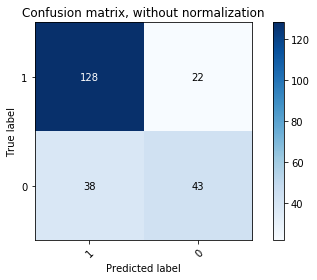

In [46]:
diabetes_tab.evaluate(RF)

Shows names of the encoded features

In [47]:
diabetes_tab.SVM.name_features

Name
0    Pregnancies
1        Glucose
2  BloodPressure
3  SkinThickness
4        Insulin
5            BMI
6            Age

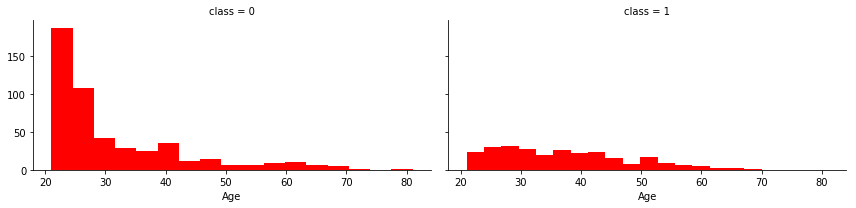

In [48]:
open_dataset(diabetes_tab.RF,"Age")

Shows param of the black box

In [49]:
diabetes_tab.RF.bb_params

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 644,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


List of the possible rows to use as instances

In [50]:
diabetes_tab.SVM.view_available_record.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   Age  \
0          0.0    131.0           66.0           40.0      0.0  34.3  22.0   
1          0.0    165.0           90.0           33.0    680.0  52.3  23.0   
2          7.0    102.0           74.0           40.0    105.0  37.2  45.0   
3          1.0     93.0           56.0           11.0      0.0  22.5  22.0   
4          6.0    114.0           88.0            0.0      0.0  27.8  66.0   

   class  
0      1  
1      0  
2      0  
3      0  
4      0

Set a record not in the test_set

In [53]:
new_record = [0.0, 100,66,40,0.0,34.3,22.0]

Explanation with global

[15/15] grid cells ████████████████████ Time elapsed: 2 seconds

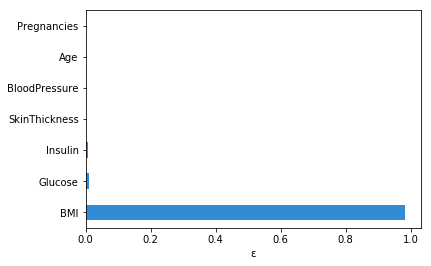

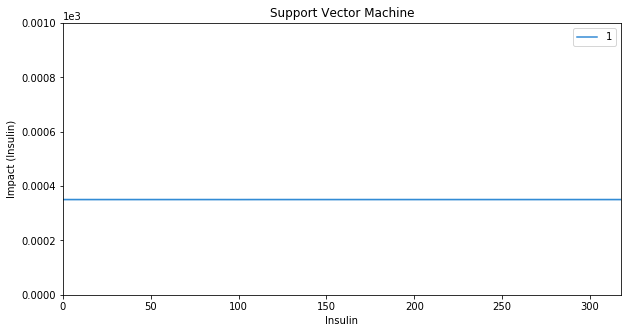

In [54]:
diabetes_tab.explainGlobal("Skater",SVM,variables=4)

Change the blackbox to compare it

[15/15] grid cells ████████████████████ Time elapsed: 2 seconds

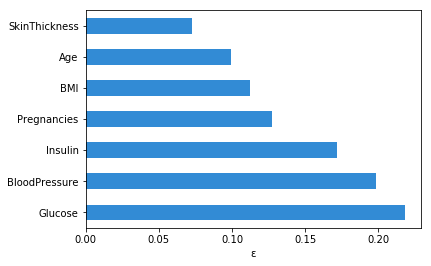

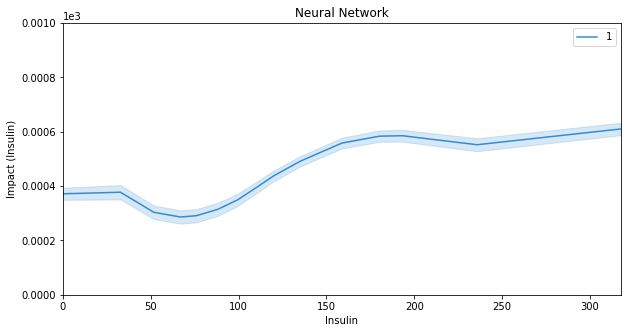

In [13]:
diabetes_tab.explainGlobal("Skater",NN,variables=4)

[15/15] grid cells ████████████████████ Time elapsed: 5 seconds

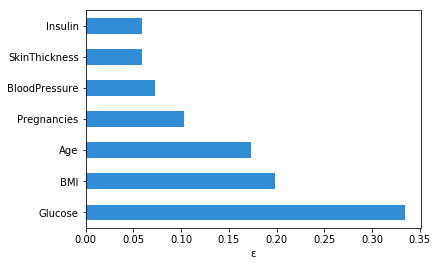

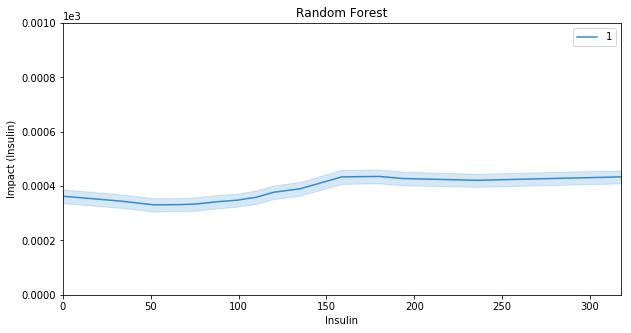

In [14]:
diabetes_tab.explainGlobal("Skater",RF,variables=4)

Explanation with Local

In [60]:
a = diabetes_tab.explainLocal(ex = "Lore",bb = RF,row = 0,display=True)

e = {
	r = { Glucose <= 138.45, Glucose > 120.89, BMI > 28.74, BloodPressure <= 79.10 } --> { class: 1 }
	c = { { Glucose <= 120.89 } --> { class: 0 }, { BMI <= 28.74 } --> { class: 0 }, { BloodPressure > 79.10 } --> { class: 0 } }    
}
Prediction(x) = { 0 }
x = { Pregnancies = 0.0, Glucose = 131.0, BloodPressure = 66.0, SkinThickness = 40.0, Insulin = 0.0, BMI = 34.3, Age = 22.0 }

r = { Glucose <= 138.45, Glucose > 120.89, BMI > 28.74, BloodPressure <= 79.10 } --> { class: 1 }
Time spent = 4930 ms
Length rules: 4
Fidelity: 0.93


In [61]:
b = diabetes_tab.explainLocal(ex = "Lore",bb = RF,row = new_record,existing=False,display=True)

e = {
	r = { Glucose <= 120.89 } --> { class: 0 }
	c = { { Glucose > 138.45 } --> { class: 1 }, { Glucose > 120.89 } --> { class: 1 } }    
}
Prediction(x) = { 0 }
x = { Pregnancies = 0.0, Glucose = 100.0, BloodPressure = 66.0, SkinThickness = 40.0, Insulin = 0.0, BMI = 34.3, Age = 22.0 }

r = { Glucose <= 120.89 } --> { class: 0 }
Time spent = 4985 ms
Length rules: 1
Fidelity: 0.94


change the instance with number 214 and use LIME

In [18]:
diabetes_tab.explainLocal(ex = "Lime",bb = NN,row = 214,display=False,num_features=5)
diabetes_tab.display("Lime",NN)

Prediction(x) = { 0 }
x = { Pregnancies = 4.0, Glucose = 125.0, BloodPressure = 80.0, SkinThickness = 0.0, Insulin = 0.0, BMI = 32.3, Age = 27.0 }

r = { 70.00 < BloodPressure <= 80.00 , Insulin <= 0.00 , 3.00 < Pregnancies <= 6.00 , 118.00 < Glucose <= 141.00 , 32.00 < BMI <= 36.40  } ---> { 0 } 
Time spent = 159 ms
Length rules: 5
Fidelity: 0.98


In [63]:
diabetes_tab.explainLocal(ex = "Anchor",bb = NN,row = 214,display=True)

Prediction(x) = { 0 }
x = { Pregnancies = 4.0, Glucose = 125.0, BloodPressure = 80.0, SkinThickness = 0.0, Insulin = 0.0, BMI = 32.3, Age = 27.0 }

r = { Glucose <= 141.00 , BloodPressure > 70.00 , Age <= 30.00  } ---> { 0 } 
Time spent = 322 ms
Length rules: 3
Fidelity: 0.98


Comparation between two instances

Mean Lore : 0.9349757015547353+/-0
Mean Lore : 0.936024120911+/-0


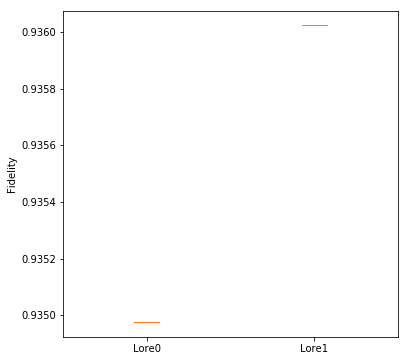

In [72]:
boxPlotExplanation("Fidelity",a,b)